## Assignment Questions 12

Question 1

- Given a singly linked list, delete **middle** of the linked list. For example, if given linked list is 1->2->**3**->4->5 then linked list should be modified to 1->2->4->5.If there are **even** nodes, then there would be **two middle** nodes, we need to delete the second middle element. For example, if given linked list is 1->2->3->4->5->6 then it should be modified to 1->2->3->5->6.If the input linked list is NULL or has 1 node, then it should return NULL

</aside>

In [2]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def deleteMiddleNode(head):
    if head is None or head.next is None:
        return None

    slow = head
    fast = head
    prev = None

    while fast and fast.next:
        fast = fast.next.next
        prev = slow
        slow = slow.next

    prev.next = slow.next

    return head

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

# Delete middle node(s)
head = deleteMiddleNode(head)

# Print the modified linked list
current = head
while current:
    print(current.val, end=" ")
    current = current.next


1 2 4 5 

Questin 2
- Given a linked list of N nodes. The task is to check if the linked list has a loop. Linked list can contain self loop.

In [4]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def hasCycle(head):
    if head is None or head.next is None:
        return False

    slow = head
    fast = head.next

    while fast is not None and fast.next is not None:
        if slow == fast:
            return True

        slow = slow.next
        fast = fast.next.next

    return False

In [6]:
#linked list without loop
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

# Check if there is a loop
has_loop = hasCycle(head)
print(has_loop)

False


Questin 3
- Given a linked list consisting of L nodes and given a number N. The task is to find the Nth node from the end of the linked list.

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def retain_delete(head, M, N):
    # Edge case: Empty linked list
    if not head:
        return None

    current = head

    while current:
        # Retain M nodes
        for _ in range(M - 1):
            if current.next:
                current = current.next
            else:
                return head

        # Delete N nodes
        for _ in range(N):
            if current.next:
                current.next = current.next.next
            else:
                return head

        # Move to the next node after deletion
        current = current.next

    return head


Questin 4
- Given a singly linked list of characters, write a function that returns true if the given list is a palindrome, else false.
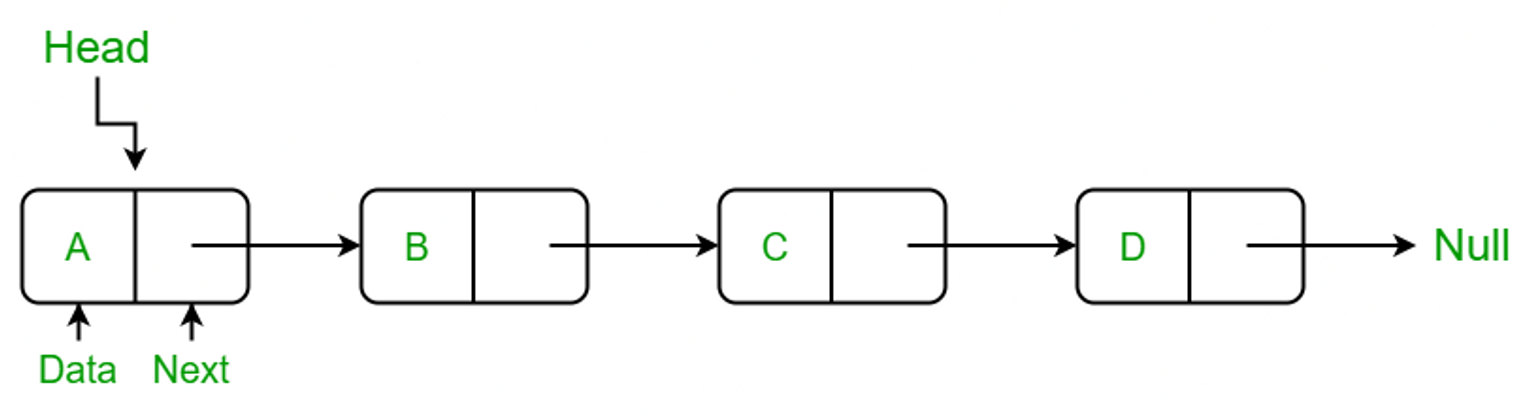


In [19]:
class Solution:
    
    def isPalindrome(self, head: ListNode) -> bool:
        slow, fast, prev = head, head, None
        while fast and fast.next:
            slow, fast = slow.next, fast.next.next
        prev, slow, prev.next = slow, slow.next, None
        while slow:
            slow.next, prev, slow = prev, slow, slow.next
        fast, slow = head, prev
        while slow:
            if fast.val != slow.val:
                return False
            fast, slow = fast.next, slow.next 
        return True

In [27]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


# Create a linked list: 1 -> 2 -> 3 -> 2 -> 1
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(2)
node5 = ListNode(1)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

# Create an instance of the Solution class
solution = Solution()

# Check if the linked list is a palindrome
is_palindrome = solution.isPalindrome(node1)
print(is_palindrome)

True


Question 5
- Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.


In [2]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None


def detectAndRemoveLoop(head):
    slowPtr = fastPtr = head

    # Detect loop using Floyd's cycle-finding algorithm
    while fastPtr and fastPtr.next:
        slowPtr = slowPtr.next
        fastPtr = fastPtr.next.next
        if slowPtr == fastPtr:
            break

    # If there is no loop, return the modified linked list
    if fastPtr is None or fastPtr.next is None:
        return head

    # Reset slowPtr to the head and move both pointers one step at a time
    slowPtr = head
    while slowPtr.next != fastPtr.next:
        slowPtr = slowPtr.next
        fastPtr = fastPtr.next

    # Remove the loop by setting the next pointer to None
    fastPtr.next = None

    return head


In [3]:
# Create the linked list nodes
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)
node6 = ListNode(6)

# Connect the nodes to form the linked list
node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
node5.next = node6
node6.next = node3  # Create the loop

# Call the function to remove the loop
head = detectAndRemoveLoop(node1)

# Print the modified linked list
current = head
while current:
    print(current.val, end=" ")
    current = current.next


1 2 3 4 5 6 

Question 6

- Given a linked list and two integers M and N. Traverse the linked list such that you retain M nodes then delete next N nodes, continue the same till end of the linked list.

Difficulty Level: Rookie

</aside>

In [9]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None


def deleteNodes(head, M, N):
    if not head:
        return None

    current = prev = head
    count = 0

    while current:
        count += 1

        if count < M:
            prev = current

        if count == M:
            prev = current
            current = current.next
            count = 0

        while current and count < N:
            current = current.next
            count += 1

        if count == N and current:
            prev.next = current.next
            current = prev
            count = 0

    return head


Question 7
- Given two linked lists, insert nodes of second list into first list at alternate positions of first list.
For example, if first list is 5->7->17->13->11 and second is 12->10->2->4->6, the first list should become 5->12->7->10->17->2->13->4->11->6 and second list should become empty. The nodes of second list should only be inserted when there are positions available. For example, if the first list is 1->2->3 and second list is 4->5->6->7->8, then first list should become 1->4->2->5->3->6 and second list to 7->8.

Use of extra space is not allowed (Not allowed to create additional nodes), i.e., insertion must be done in-place. Expected time complexity is O(n) where n is number of nodes in first list.

In [11]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None


def mergeLists(head1, head2):
    if not head1:
        return head2
    if not head2:
        return head1

    current1 = head1
    current2 = head2

    while current1 and current2:
        next1 = current1.next
        next2 = current2.next

        current1.next = current2
        if next1:
            current2.next = next1
        else:
            current2.next = next2
            break

        current1 = next1
        current2 = next2

    return head1


In [12]:
# Create the first linked list
node1 = ListNode(5)
node2 = ListNode(7)
node3 = ListNode(17)
node4 = ListNode(13)
node5 = ListNode(11)
node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

# Create the second linked list
node6 = ListNode(12)
node7 = ListNode(10)
node8 = ListNode(2)
node9 = ListNode(4)
node10 = ListNode(6)
node6.next = node7
node7.next = node8
node8.next = node9
node9.next = node10

# Merge the second list into the first list
head1 = mergeLists(node1, node6)

# Print the merged list
current = head1
while current:
    print(current.val, end=" ")
    current = current.next

# Print the second list (which should


5 12 7 10 17 2 13 4 11 6 

Question 8
- Given a singly linked list, find if the linked list is [circular](https://www.geeksforgeeks.org/circular-linked-list/amp/) or not.

> A linked list is called circular if it is not NULL-terminated and all nodes are connected in the form of a cycle. Below is an example of a circular linked list.
>
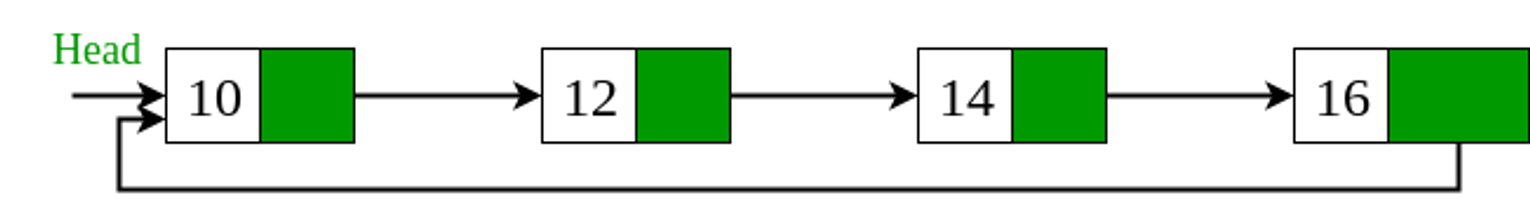

In [13]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None


def isCircular(head):
    if not head:
        return False

    slowPtr = fastPtr = head

    while fastPtr and fastPtr.next:
        slowPtr = slowPtr.next
        fastPtr = fastPtr.next.next
        if slowPtr == fastPtr:
            return True

    return False


In [14]:
# Create the circular linked list
node1 = ListNode(10)
node2 = ListNode(12)
node3 = ListNode(14)
node4 = ListNode(16)
node5 = ListNode(18)
node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
node5.next = node1  # Create a cycle

# Check if the linked list is circular
result = isCircular(node1)
print(result)  # Output: True


True
